In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#### Lottka-Volterra Equations

Also known as the predator-prey equations, the Lotka-Volterra equations are a pair of first-order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. They were proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\delta y + \gamma xy$$

In [63]:
alpha = 1. #mortality rate due to predators
beta = 1.
delta = 1.
gamma = 1.
x0 = 3.
y0 = 2.

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [64]:
Nt = 1000
tmax = 30
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

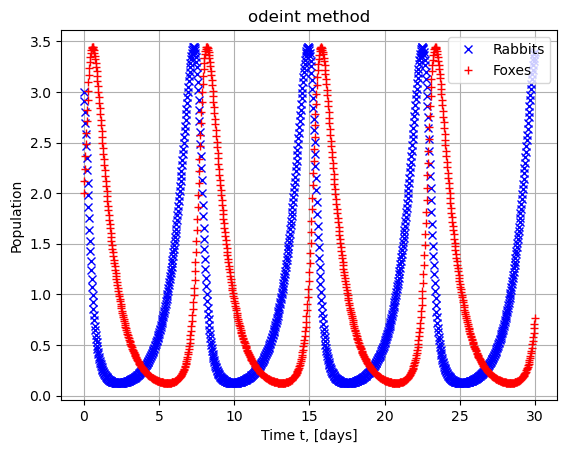

In [65]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'xb', label = 'Rabbits')
plt.plot(t, y, '+r', label = "Foxes")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

In [66]:
import random
import matplotlib.cm as cm

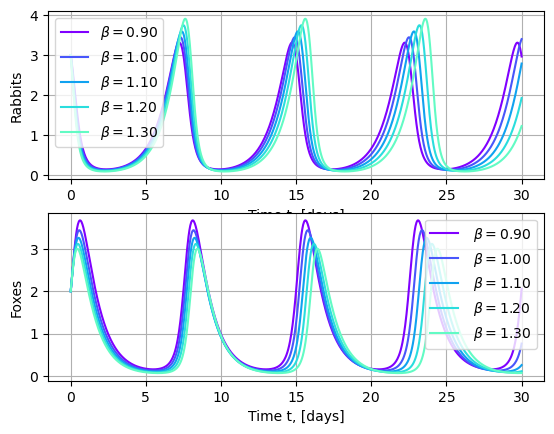

In [67]:
betas = np.arange(0.9, 1.4, 0.1)

nums=np.random.random((10,len(betas)))
colors = cm.rainbow(np.linspace(0, 1, nums.shape[0]))  # generate the colors for each data set

fig, ax = plt.subplots(2,1)

for beta, i in zip(betas, range(len(betas))):
    res = integrate.odeint(derivative, X0, t, args = (alpha,beta, delta, gamma))
    ax[0].plot(t, res[:,0], color = colors[i],  linestyle = '-', label = r"$\beta = $" + "{0:.2f}".format(beta))
    ax[1].plot(t, res[:,1], color = colors[i], linestyle = '-', label = r" $\beta = $" + "{0:.2f}".format(beta))
    ax[0].legend()
    ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time t, [days]')
ax[0].set_ylabel('Rabbits')
ax[1].set_xlabel('Time t, [days]')
ax[1].set_ylabel('Foxes');

1.0 1.2999999999999998 1.0 1.0


Text(0.5, 1.0, 'Predator-Prey Phase Plane')

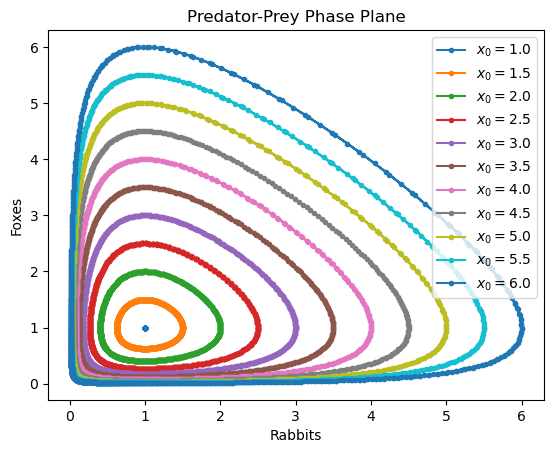

In [68]:
print(alpha, beta, delta, gamma)
beta = 1.0

plt.figure()
IC = np.linspace(1.0, 6.0, 11) # initial conditions for deer population (prey)
for rabbit in IC:
    X0 = [rabbit, 1.0]
    #plt.plot(X0[0], X0[1], "o")
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], ".-", label = "$x_0 =$"+str(X0[0]))
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.legend()
plt.title("Predator-Prey Phase Plane")